In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    def windowing(self, array, window_size):
        X = []
        Y = []

        for i in range(len(array)-window_size*2):
            X.append(array[i:i+window_size])
            Y.append(array[i+window_size:i + window_size*2])

        return np.asarray(X), np.asarray(Y)

In [3]:
filename = "data/"+os.listdir("data")[0]
data = np.loadtxt(filename, delimiter = ",",skiprows = 1, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

# 데이터 노멀라이즈
data = data - np.min(data,axis = 0)+0.0001
data = data/np.max(data,axis = 0)

train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

X = []
Y = []
X1 = []
Y1 = []
window_size = 12

# 윈도윙 시간의 흐름에 따라 움직이는 데이터 학습 전략
# ex) 과거 데이터 12개를 보고 미래 데이터 12개 예측
for i in range(len(train_data) - window_size*2):
    X.append(train_data[i:i+window_size])
    Y.append(train_data[i+window_size:i+window_size*2])

train_X = np.asarray(X)
train_Y = np.asarray(Y)

print(train_X.shape)
print(train_Y.shape)

for i in range(len(test_data) - window_size * 2):
    X1.append(test_data[i:i+window_size])
    Y1.append(test_data[i+window_size:i+window_size*2])

test_X = np.asarray(X1)
test_Y = np.asarray(Y1)
print(test_X.shape)
print(test_Y.shape)

(336400, 12, 14)
(336400, 12, 14)
(84083, 12, 14)
(84083, 12, 14)


In [4]:
# 인공신경망 제작
from tensorflow import keras

In [5]:
EPOCHS = 10

In [6]:
model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences = True)),
    keras.layers.Dense(32),
    keras.layers.Dense(14)
])

In [7]:
#잔차의 절대값에 대한 평균 
model.compile(optimizer = "adam", metrics = ["mae"], loss = "mse")

In [8]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_X, train_Y, epochs = EPOCHS,
                   validation_data = (test_X, test_Y),
                   callbacks = [early_stop])

Train on 336400 samples, validate on 84083 samples
Epoch 1/10
336400/336400 [==============================] - 416s 1ms/sample - loss: 0.0043 - mae: 0.0335 - val_loss: 0.0041 - val_mae: 0.0325
Epoch 2/10
336400/336400 [==============================] - 411s 1ms/sample - loss: 0.0038 - mae: 0.0292 - val_loss: 0.0039 - val_mae: 0.0296
Epoch 3/10
336400/336400 [==============================] - 417s 1ms/sample - loss: 0.0037 - mae: 0.0283 - val_loss: 0.0037 - val_mae: 0.0279
Epoch 4/10
336400/336400 [==============================] - 410s 1ms/sample - loss: 0.0036 - mae: 0.0277 - val_loss: 0.0037 - val_mae: 0.0282
Epoch 5/10
336400/336400 [==============================] - 418s 1ms/sample - loss: 0.0036 - mae: 0.0274 - val_loss: 0.0036 - val_mae: 0.0272
Epoch 6/10
336400/336400 [==============================] - 452s 1ms/sample - loss: 0.0036 - mae: 0.0271 - val_loss: 0.0037 - val_mae: 0.0273
Epoch 7/10
336400/336400 [==============================] - 407s 1ms/sample - loss: 0.0036 - mae:

In [11]:
pred = model.predict(train_X[:1])
pred

array([[[ 0.80851203,  0.23803002,  0.23631112,  0.32208452,
          0.9201455 ,  0.03319583,  0.07602094,  0.00196456,
          0.07579872,  0.07634194,  0.74900544,  0.02541536,
          0.02596536,  0.46742308],
        [ 0.8066673 ,  0.23631293,  0.23400877,  0.3209594 ,
          0.921643  ,  0.02933964,  0.0760548 , -0.00162266,
          0.07549915,  0.07574241,  0.74923265,  0.03244695,
          0.03321471,  0.46084163],
        [ 0.8078464 ,  0.23610342,  0.23345609,  0.32029238,
          0.9169786 ,  0.02971761,  0.07580394, -0.00225819,
          0.07581142,  0.07542789,  0.7502301 ,  0.03346179,
          0.03487992,  0.4674608 ],
        [ 0.8070601 ,  0.2388703 ,  0.23668768,  0.32341912,
          0.9162464 ,  0.03350011,  0.07800202,  0.00092422,
          0.07785682,  0.07812057,  0.7478397 ,  0.03367462,
          0.03406215,  0.46880132],
        [ 0.8080713 ,  0.2413345 ,  0.23923361,  0.32547238,
          0.91249895,  0.0349993 ,  0.07855842,  0.00269927,
  

In [12]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X[:200]), dr.test_Y[:200], history)

array([[[0.81601984, 0.23486609, 0.22999797, 0.31816434, 0.92533036,
         0.03454468, 0.07737349, 0.00434905, 0.07487762, 0.07602043,
         0.75626336, 0.01094319, 0.02128076, 0.43972238],
        [0.81710092, 0.23519782, 0.23016261, 0.31857997, 0.92533036,
         0.03470386, 0.07737349, 0.00434905, 0.07544484, 0.07602043,
         0.75638308, 0.02461364, 0.02681265, 0.51333347],
        [0.81778888, 0.23801752, 0.23279678, 0.32315186, 0.92992541,
         0.0353406 , 0.07955293, 0.0041317 , 0.07714647, 0.07816175,
         0.75404838, 0.02256307, 0.03191901, 0.43305571],
        [0.81778888, 0.23801752, 0.23279678, 0.32232061, 0.92647912,
         0.0353406 , 0.07918969, 0.00434905, 0.07657926, 0.07780486,
         0.75407832, 0.00479149, 0.02128076, 0.75666673],
        [0.81828028, 0.23735406, 0.23213824, 0.32128154, 0.92533036,
         0.03518141, 0.07846321, 0.00456639, 0.07657926, 0.07709109,
         0.75485655, 0.02187955, 0.02681265, 0.608889  ],
        [0.81808372,

In [15]:
prediction = model(test_X[:200])
label = test_Y[:200]


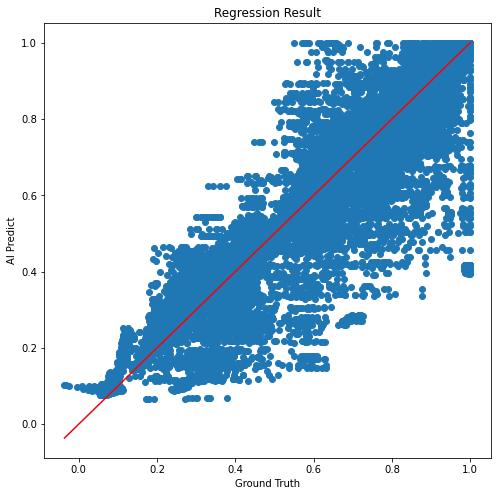

In [16]:
    X = prediction / np.max(prediction, axis=0)
    Y = label / np.max(label, axis=0)

    minval = min(np.min(X), np.min(Y))
    maxval = max(np.max(X), np.max(Y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(X, Y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")


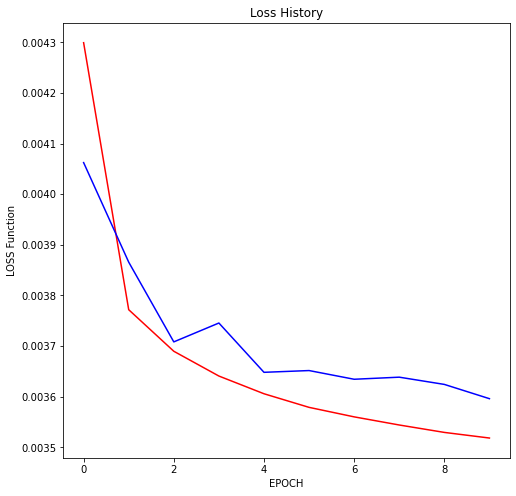

In [17]:
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")